In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Load sample dataset (using synthetic data here for demo)
def generate_sample_data(n_samples=10000):
    np.random.seed(42)
    data = {
        'amount': np.random.exponential(scale=100, size=n_samples),
        'transaction_type': np.random.choice([0, 1], size=n_samples), # 0 = online, 1 = physical
        'location_difference': np.random.choice([0, 1], size=n_samples), # 1 if sudden far-away location
        'previous_fraud': np.random.choice([0, 1], size=n_samples, p=[0.95, 0.05]),
        'is_fraud': np.random.choice([0, 1], size=n_samples, p=[0.98, 0.02])
    }
    return pd.DataFrame(data)

# Step 2: Train a simple fraud detection model
def train_fraud_model(df):
    X = df.drop('is_fraud', axis=1)
    y = df['is_fraud']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    print("Fraud Detection Model Evaluation:")
    print(classification_report(y_test, preds))

    return model

# Step 3: Guard transactions
class TransactionGuard:
    def __init__(self, model):
        self.model = model

    def assess_transaction(self, transaction):
        transaction_df = pd.DataFrame([transaction])
        prediction = self.model.predict(transaction_df)[0]

        if prediction == 1:
            print("🚨 Fraud detected! Transaction BLOCKED.")
            return False
        else:
            print("✅ Transaction allowed.")
            return True

# Step 4: Simulate a transaction
def simulate_transaction():
    transaction = {
        'amount': np.random.exponential(scale=100),
        'transaction_type': np.random.choice([0, 1]),
        'location_difference': np.random.choice([0, 1]),
        'previous_fraud': np.random.choice([0, 1]),
    }
    print(f"Processing transaction: {transaction}")
    return transaction

# Step 5: Main flow
if __name__ == "__main__":
    # Generate data and train model
    df = generate_sample_data()
    fraud_model = train_fraud_model(df)

    # Create the transaction guard
    guard = TransactionGuard(fraud_model)

    # Simulate and assess transactions
    for _ in range(5):
        tx = simulate_transaction()
        guard.assess_transaction(tx)

Fraud Detection Model Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1956
           1       0.00      0.00      0.00        44

    accuracy                           0.95      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.96      0.95      0.96      2000

Processing transaction: {'amount': 35.51219236484333, 'transaction_type': np.int64(0), 'location_difference': np.int64(1), 'previous_fraud': np.int64(0)}
✅ Transaction allowed.
Processing transaction: {'amount': 9.168960267166888, 'transaction_type': np.int64(1), 'location_difference': np.int64(0), 'previous_fraud': np.int64(1)}
✅ Transaction allowed.
Processing transaction: {'amount': 27.74173477391315, 'transaction_type': np.int64(1), 'location_difference': np.int64(1), 'previous_fraud': np.int64(1)}
✅ Transaction allowed.
Processing transaction: {'amount': 70.07764651339686, 'transaction_type': np.int64(0), 'location_difference'

Confusion Matrix:
[[76  0]
 [ 4  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       0.00      0.00      0.00         4

    accuracy                           0.95        80
   macro avg       0.47      0.50      0.49        80
weighted avg       0.90      0.95      0.93        80



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


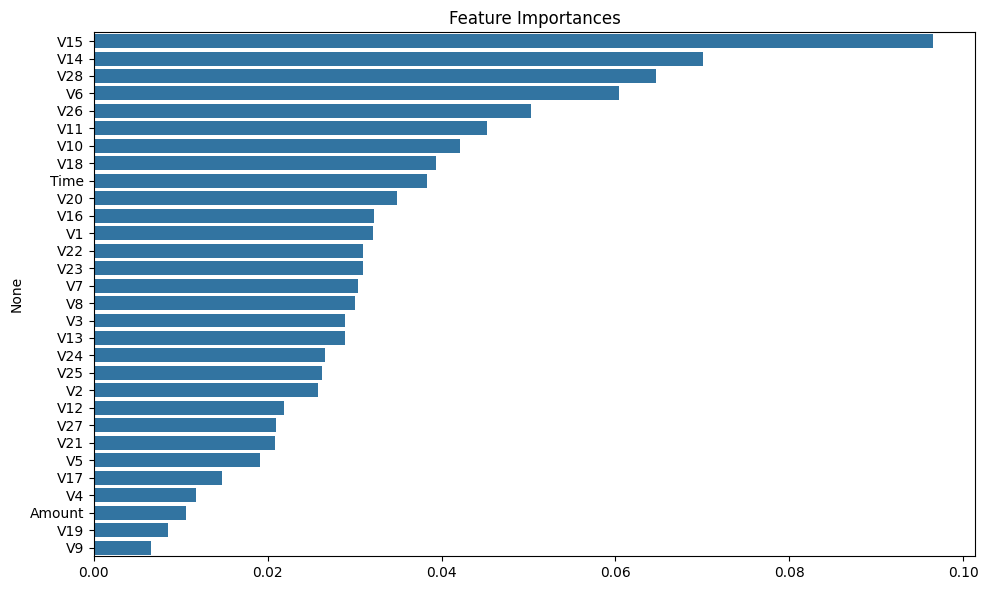

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
df = pd.read_csv("sample_credit_card_transactions.csv")

# Step 2: Data preprocessing
features = df.drop("Class", axis=1)
labels = df["Class"]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Step 4: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Feature importance visualization
importances = model.feature_importances_
feature_names = df.columns[:-1]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


Confusion Matrix:
 [[76  0]
 [ 4  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       0.00      0.00      0.00         4

    accuracy                           0.95        80
   macro avg       0.47      0.50      0.49        80
weighted avg       0.90      0.95      0.93        80

ROC AUC Score: 0.6101973684210527


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


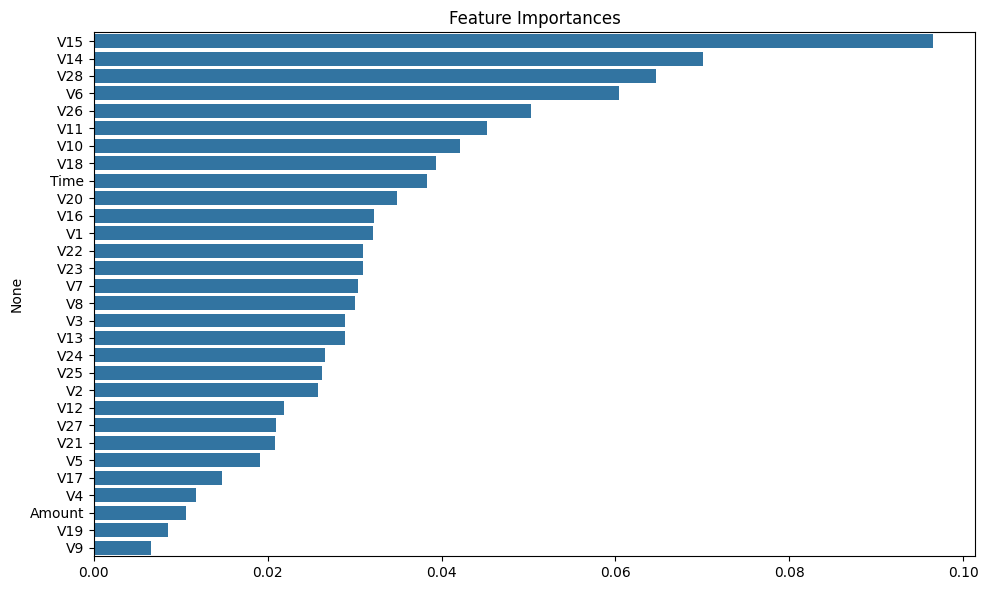

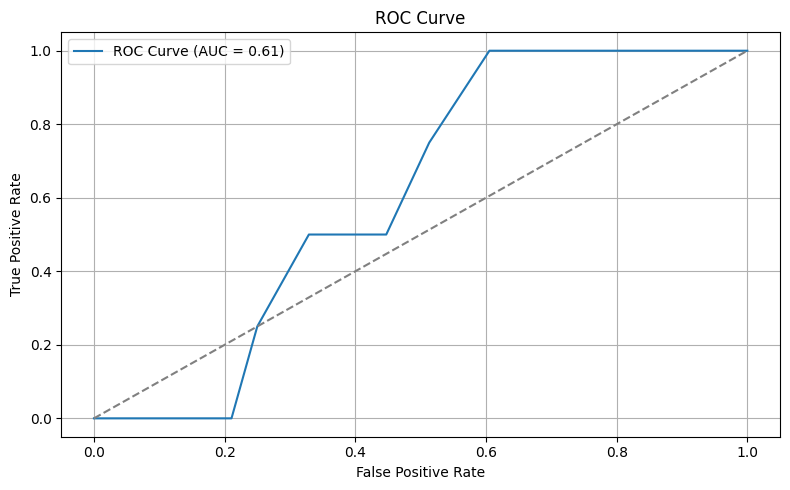

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("sample_credit_card_transactions.csv")

# Step 2: Separate features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Build and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 7: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Step 8: Visualizations
# Feature importance
importances = model.feature_importances_
feature_names = df.columns[:-1]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
